np.matrix(x_vals).shape (1, 100)
A.shape:  (100, 2)
b.shape:  (100, 1)
tf.transpose(A_tensor):  (2, 100)
product.shape:  (2, 100)
solution.shape (2, 1)
solution_eval: [[ 1.05310572]
 [-0.22527003]]
slope: 1.0531057159014052
y_intercept: -0.22527002522750952


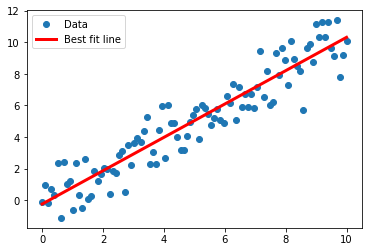

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
print ("np.matrix(x_vals).shape",np.matrix(x_vals).shape)
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

A = np.column_stack((x_vals_column, ones_column))
print ("A.shape: ",A.shape)
# Create b matrix
b = np.transpose(np.matrix(y_vals))
print ("b.shape: ",b.shape)
# Create tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
print ("tf.transpose(A_tensor): ",tf.transpose(A_tensor).shape)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
print ("product.shape: ",product.shape)
solution = tf.matmul(product, b_tensor)
print ("solution.shape",solution.shape)


solution_eval = sess.run(solution)
print ("solution_eval:",solution_eval)
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()